In [6]:
import networkx as nx
import numpy as np
import pickle
from pathlib import Path
import os
import torch
import time
import dgl

from data.data import LoadData
# import CSL_data
from data.molecules import MoleculeDataset
# from data.superpixels import SuperPixDataset
# from data.superpixels import SuperPixDatasetDGL
# from data.TUs import TUsDataset
# from data.TSP import TSPDataset
# from data.COLLAB import COLLABDataset
# from data.SBMs import SBMsDataset

In [3]:
import csv
import pandas as pd
import matplotlib.pyplot as plt

def store_reduction_data(file, original_graphs, reduced_graphs):
    i = 0
    
    with open(file, mode='w') as csv_file:
        writer = csv.writer(csv_file)
        fieldnames = ['Graph nr', 
                      'Original nodes', 'Reduced nodes', 'Node compr. rate', 
                      'Original edges', 'Reduced edges', 'Edge compr. rate'
                     ]
        writer = csv.writer(csv_file)
        writer.writerow(fieldnames)

        while i < len(reduced_graphs):
            x = original_graphs.train.__getitem__(i)[0]
            y = reduced_graphs[i]

            writer.writerow([i,x.number_of_nodes(), 
                             y.number_of_nodes(), 
                             round((((x.number_of_nodes() - y.number_of_nodes())/x.number_of_nodes())*100),2),
                             x.number_of_edges(), 
                             y.number_of_edges(),
                             round((((x.number_of_edges() - y.number_of_edges())/x.number_of_edges())*100),2)
                            ])

            i += 1
            
            
def create_scatter_plot(df):
    print('Analysis')
    print('\n')
    
    node = df[df.columns[3]]
    edge = df[df.columns[6]]

    plt.scatter(node, edge, s = 1)
    plt.show()
    
    edge.plot.hist(grid=True, bins=20, rwidth=0.9)
    node.plot.hist(grid=True, bins=20, rwidth=0.9)
    plt.legend()
    
    i = 0
    count_node = {"<=10":0,
            "<=20":0,
            "<=30":0,
            "<=40":0,
            "<=50":0,
            "<=60":0,
            "<=70":0,
            "<=80":0,
            "<=90":0,
            "<=100":0
            }
    
    count_edge = {"<=10":0,
            "<=20":0,
            "<=30":0,
            "<=40":0,
            "<=50":0,
            "<=60":0,
            "<=70":0,
            "<=80":0,
            "<=90":0,
            "<=100":0
            }
    while i < len(node):
        if node[i] <= 10:
            count_node["<=10"] += 1
        elif node[i] <= 20:
            count_node["<=20"] += 1
        elif node[i] <= 30:
            count_node["<=30"] += 1
        elif node[i] <= 40:
            count_node["<=40"] += 1
        elif node[i] <= 50:
            count_node["<=50"] += 1
        elif node[i] <= 60:
            count_node["<=60"] += 1
        elif node[i] <= 70:
            count_node["<=70"] += 1
        elif node[i] <= 80:
            count_node["<=80"] += 1
        elif node[i] <= 90:
            count_node["<=90"] += 1
        elif node[i] <= 100:
            count_node["<=100"] += 1
        i += 1
    i = 0
    while i < len(edge):
        print
        if edge[i] <= 10:
            count_edge["<=10"] += 1
        elif edge[i] <= 20:
            count_edge["<=20"] += 1
        elif edge[i] <= 30:
            count_edge["<=30"] += 1
        elif edge[i] <= 40:
            count_edge["<=40"] += 1
        elif edge[i] <= 50:
            count_edge["<=50"] += 1
        elif edge[i] <= 60:
            count_edge["<=60"] += 1
        elif edge[i] <= 70:
            count_edge["<=70"] += 1
        elif edge[i] <= 80:
            count_edge["<=80"] += 1
        elif edge[i] <= 90:
            count_edge["<=90"] += 1
        elif edge[i] <= 100:
            count_edge["<=100"] += 1
        i += 1
    print('nodes reduction\n', count_node)
    print('edges reduction\n', count_edge)

In [5]:
# MNIST_graphs = SuperPixDataset('MNIST')

# print("Getting MNIST colored graphs ...")
# MNIST_colored_pkl = open('C:\\Users\\User1\\Documents\\GitHub\\ResearchProject1\\WLColorRefinement\\data\\superpixels\\MNIST_train_colored.pkl','rb')
# MNIST_colored_graphs = pickle.load(MNIST_colored_pkl)
# print("Finished MNIST getting colored graph\n")

# print("Getting MNIST reduced graphs ...")
# MNIST_reduced_pkl = open('C:\\Users\\User1\\Documents\\GitHub\\ResearchProject1\\WLColorRefinement\\data\\superpixels\\MNIST_train_reduced.pkl','rb')
# MNIST_reduced_graphs = pickle.load(MNIST_reduced_pkl)
# print("Finished MNIST getting reduced graph")

[I] Loading dataset MNIST...
train, test, val sizes : 55000 5000 10000
[I] Finished loading.
[I] Data load time: 52.9049s
Getting MNIST colored graphs ...
Finished MNIST getting colored graph

Getting MNIST reduced graphs ...
Finished MNIST getting reduced graph


In [6]:
# CIFAR10_graphs = SuperPixDataset('CIFAR10')

# print("\nGetting CIFAR10 colored graphs ...")
# CIFAR10_colored_pkl = open('C:\\Users\\User1\\Documents\\GitHub\\ResearchProject1\\WLColorRefinement\\data\\superpixels\\CIFAR10_train_colored.pkl','rb')
# CIFAR10_colored_graphs = pickle.load(CIFAR10_colored_pkl)
# print("Finished CIFAR10 getting colored graph\n")

# print("Getting CIFAR10 reduced graphs ...")
# CIFAR10_reduced_pkl = open('C:\\Users\\User1\\Documents\\GitHub\\ResearchProject1\\WLColorRefinement\\data\\superpixels\\CIFAR10_train_reduced.pkl','rb')
# CIFAR10_reduced_graphs = pickle.load(CIFAR10_reduced_pkl)
# print("Finished CIFAR10 getting reduced graph")

[I] Loading dataset CIFAR10...
train, test, val sizes : 45000 10000 10000
[I] Finished loading.
[I] Data load time: 53.4441s

Getting CIFAR10 colored graphs ...
Finished CIFAR10 getting colored graph

Getting CIFAR10 reduced graphs ...
Finished CIFAR10 getting reduced graph


In [19]:
ZINC_graphs = MoleculeDataset('ZINC')

print("Getting ZINC reduced graphs ...")
# ZINC_reduced_pkl = open('C:\\Users\\User1\\Documents\\GitHub\\ResearchProject1\\data\\molecules\\ZINC_train_reduced.pkl','rb')
ZINC_reduced_graphs = MoleculeDataset('ZINC_reduced')
print("Finished ZINC getting reduced graph")

[I] Loading dataset ZINC...
train, test, val sizes : 10000 1000 1000
[I] Finished loading.
[I] Data load time: 8.0091s
Getting ZINC reduced graphs ...
[I] Loading dataset ZINC_reduced...


FileNotFoundError: [Errno 2] No such file or directory: 'C:\\Users\\User1\\Documents\\GitHub\\ResearchProject1\\WLColorRefinement\\data\\molecules\\ZINC_reduced.pkl'

In [16]:
print(ZINC_reduced_graphs[0])

TypeError: 'NoneType' object is not subscriptable

In [7]:
# class DotDict(dict):
#     def __init__(self, **kwds):
#         self.update(kwds)
#         self.__dict__ = self
        
# SBM_CLUSTER_graphs = SBMsDataset('SBM_CLUSTER')
# print("\nGetting CLUSTER colored graphs ...")
# CLUSTER_colored_pkl = open('C:\\Users\\User1\\Documents\\GitHub\\ResearchProject1\\WLColorRefinement\\data\\SBMs\\CLUSTER_train_colored.pkl','rb')
# CLUSTER_colored_graphs = pickle.load(CLUSTER_colored_pkl)
# print("Finished CLUSTER getting colored graph\n")

# print("Getting CLUSTER reduced graphs ...")
# CLUSTER_reduced_pkl = open('C:\\Users\\User1\\Documents\\GitHub\\ResearchProject1\\WLColorRefinement\\data\\SBMs\\CLUSTER_train_reduced.pkl','rb')
# CLUSTER_reduced_graphs = pickle.load(CLUSTER_reduced_pkl)
# print("Finished CLUSTER getting reduced graph")

[I] Loading dataset SBM_CLUSTER...
train, test, val sizes : 10000 1000 1000
[I] Finished loading.
[I] Data load time: 49.7186s

Getting CLUSTER colored graphs ...
Finished CLUSTER getting colored graph

Getting CLUSTER reduced graphs ...
Finished CLUSTER getting reduced graph


In [9]:
# SBM_PATTERN_graphs = SBMsDataset('SBM_PATTERN')

# print("\nGetting PATTERN colored graphs ...")
# PATTERN_colored_pkl = open('C:\\Users\\User1\\Documents\\GitHub\\ResearchProject1\\WLColorRefinement\\data\\SBMs\\PATTERN_train_colored.pkl','rb')
# PATTERN_colored_graphs = pickle.load(PATTERN_colored_pkl)
# print("Finished PATTERN getting colored graph\n")

# print("Getting PATTERN reduced graphs ...")
# PATTERN_reduced_pkl = open('C:\\Users\\User1\\Documents\\GitHub\\ResearchProject1\\WLColorRefinement\\data\\SBMs\\PATTERN_train_reduced.pkl','rb')
# PATTERN_reduced_graphs = pickle.load(PATTERN_reduced_pkl)
# print("Finished PATTERN getting reduced graph")

[I] Loading dataset SBM_PATTERN...
train, test, val sizes : 10000 2000 2000
[I] Finished loading.
[I] Data load time: 91.2629s

Getting PATTERN colored graphs ...
Finished PATTERN getting colored graph

Getting PATTERN reduced graphs ...
Finished PATTERN getting reduced graph


Analysis




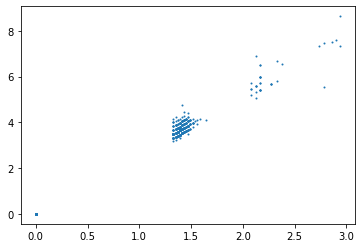

nodes reduction
 {'<=10': 8735, '<=20': 0, '<=30': 0, '<=40': 0, '<=50': 0, '<=60': 0, '<=70': 0, '<=80': 0, '<=90': 0, '<=100': 0}
edges reduction
 {'<=10': 8735, '<=20': 0, '<=30': 0, '<=40': 0, '<=50': 0, '<=60': 0, '<=70': 0, '<=80': 0, '<=90': 0, '<=100': 0}


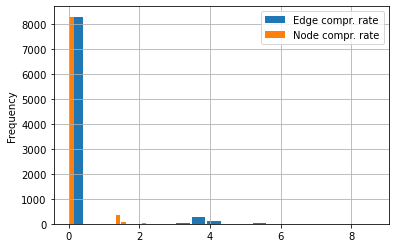

In [80]:
create_scatter_plot(pd.read_csv (r'CompressionMNIST.csv'))

Analysis




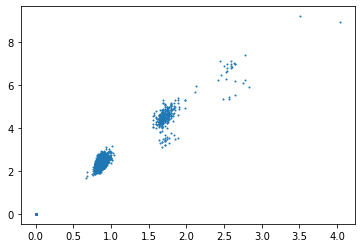

nodes reduction
 {'<=10': 45000, '<=20': 0, '<=30': 0, '<=40': 0, '<=50': 0, '<=60': 0, '<=70': 0, '<=80': 0, '<=90': 0, '<=100': 0}
edges reduction
 {'<=10': 45000, '<=20': 0, '<=30': 0, '<=40': 0, '<=50': 0, '<=60': 0, '<=70': 0, '<=80': 0, '<=90': 0, '<=100': 0}


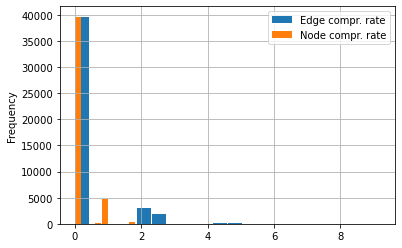

In [81]:
store_reduction_data('CompressionCIFAR10.csv', CIFAR10_graphs, CIFAR10_reduced_graphs[0])
create_scatter_plot(pd.read_csv (r'CompressionCIFAR10.csv'))

Analysis




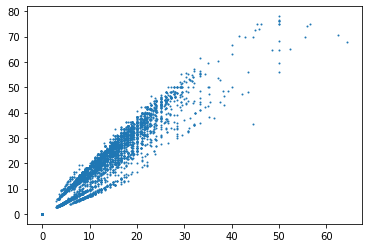

nodes reduction
 {'<=10': 6411, '<=20': 2882, '<=30': 608, '<=40': 71, '<=50': 22, '<=60': 4, '<=70': 2, '<=80': 0, '<=90': 0, '<=100': 0}
edges reduction
 {'<=10': 4422, '<=20': 2863, '<=30': 1615, '<=40': 783, '<=50': 259, '<=60': 32, '<=70': 12, '<=80': 14, '<=90': 0, '<=100': 0}


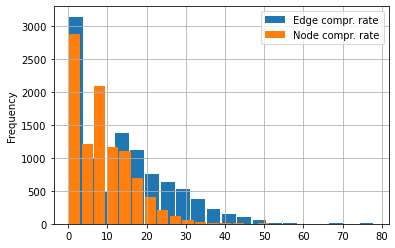

In [82]:
store_reduction_data('CompressionZINC.csv', ZINC_graphs, ZINC_reduced_graphs[0])
# create_scatter_plot(pd.read_csv (r'CompressionMolcules.csv'))

Analysis




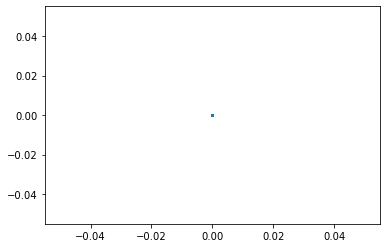

nodes reduction
 {'<=10': 10000, '<=20': 0, '<=30': 0, '<=40': 0, '<=50': 0, '<=60': 0, '<=70': 0, '<=80': 0, '<=90': 0, '<=100': 0}
edges reduction
 {'<=10': 10000, '<=20': 0, '<=30': 0, '<=40': 0, '<=50': 0, '<=60': 0, '<=70': 0, '<=80': 0, '<=90': 0, '<=100': 0}


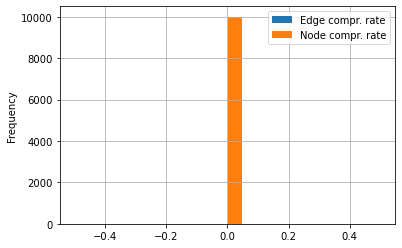

In [83]:
create_scatter_plot(pd.read_csv (r'CompressionCLUSTER.csv'))

Analysis




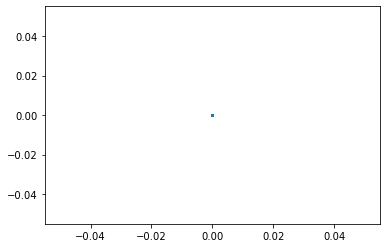

nodes reduction
 {'<=10': 10000, '<=20': 0, '<=30': 0, '<=40': 0, '<=50': 0, '<=60': 0, '<=70': 0, '<=80': 0, '<=90': 0, '<=100': 0}
edges reduction
 {'<=10': 10000, '<=20': 0, '<=30': 0, '<=40': 0, '<=50': 0, '<=60': 0, '<=70': 0, '<=80': 0, '<=90': 0, '<=100': 0}


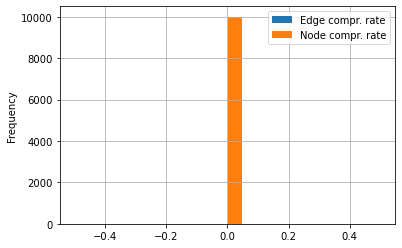

In [84]:
create_scatter_plot(pd.read_csv (r'CompressionPATTERN.csv'))

In [10]:
"""
    Funtion to draw the graph\n",
"""
def drawGraph(G):
    nx_G = G.to_networkx().to_undirected()
    pos = nx.kamada_kawai_layout(nx_G)
    nx.draw(nx_G, pos, with_labels=True, node_color=G.ndata['feat'])

In [66]:
import pandas as pd

"""
    Check reduction of graphs
"""

def checkReduction(data_file, original_graphs, reduced_graphs):
    
    graphs_reduction = {}
    node_compr_btw_30_50 = {}
    edge_compr_btw_30_50 = {}
    node_compr_gt_50 = {}
    edge_compr_gt_50 = {}


    for i in data_file.index:
        graph_nr = data_file['Graph nr'][i]
        node_compr_rate = data_file['Node compr. rate'][i]
        edge_compr_rate = data_file['Edge compr. rate'][i]
        graphs = {}
        if node_compr_rate >= 50:
            graphs['Original'] = original_graphs.train.__getitem__(i)
            graphs['Reduced'] = reduced_graphs[0][i]
            graphs['Compression'] = node_compr_rate
            node_compr_gt_50[graph_nr] = graphs
        
        if edge_compr_rate >= 50:
            graphs['Original'] = original_graphs.train.__getitem__(i)
            graphs['Reduced'] = reduced_graphs[0][i]
            graphs['Compression'] = edge_compr_rate
            edge_compr_gt_50[graph_nr] = graphs

        if node_compr_rate < 50 and node_compr_rate >=30:
            graphs['Original'] = original_graphs.train.__getitem__(i)
            graphs['Reduced'] = reduced_graphs[0][i]
            graphs['Compression'] = node_compr_rate
            node_compr_btw_30_50[graph_nr] = graphs
        
        if edge_compr_rate < 50 and edge_compr_rate >=30:
            graphs['Original'] = original_graphs.train.__getitem__(i)
            graphs['Reduced'] = reduced_graphs[0][i]
            graphs['Compression'] = edge_compr_rate
            edge_compr_btw_30_50[graph_nr] = graphs
    
    graphs_reduction['node_compr_gt_50'] = node_compr_gt_50
    graphs_reduction['edge_compr_gt_50'] = edge_compr_gt_50
    graphs_reduction['node_compr_btw_30_50'] = node_compr_btw_30_50
    graphs_reduction['edge_compr_btw_30_50'] = edge_compr_btw_30_50
    return graphs_reduction

In [67]:
"""
    Check reduction of ZINC graphs
"""
ZINC_file = pd.read_csv (r'CompressionMolcules.csv')
ZINC_graphs_analysis = checkReduction(ZINC_file, ZINC_graphs, ZINC_reduced_graphs)

In [68]:
"""
    Check reduction of MNIST graphs
"""
MNIST_file = pd.read_csv (r'CompressionMNIST.csv')
MNIST_graphs_analysis = checkReduction(MNIST_file, MNIST_graphs, MNIST_reduced_graphs)

In [69]:
"""
    Check reduction of CIFAR10 graphs
"""
CIFAR10_file = pd.read_csv (r'CompressionCIFAR10.csv')
CIFAR10_graphs_analysis = checkReduction(CIFAR10_file, CIFAR10_graphs, CIFAR10_reduced_graphs)

In [70]:
"""
    Check reduction of CLUSTER graphs
"""
CLUSTER_file = pd.read_csv (r'CompressionCLUSTER.csv')
CLUSTER_graphs_analysis = checkReduction(CLUSTER_file, SBM_CLUSTER_graphs, CLUSTER_reduced_graphs)

In [71]:
"""
    Check reduction of PATTERN graphs
"""
PATTERN_file = pd.read_csv (r'CompressionPATTERN.csv')
PATTERN_graphs_analysis = checkReduction(PATTERN_file, SBM_PATTERN_graphs, PATTERN_reduced_graphs)

In [72]:
import pprint
print('# gaphs edge_compr_btw_30_50 = ', len(ZINC_graphs_analysis['edge_compr_btw_30_50']))
print('# gaphs edge_compr_gt_50 = ', len(ZINC_graphs_analysis['edge_compr_gt_50']))
print('# gaphs node_compr_btw_30_50 = ', len(ZINC_graphs_analysis['node_compr_btw_30_50']))
print('# gaphs node_compr_gt_50 = ', len(ZINC_graphs_analysis['node_compr_gt_50']))
# pprint.pprint(ZINC_graphs_analysis)

# gaphs edge_compr_btw_30_50 =  1065
# gaphs edge_compr_gt_50 =  79
# gaphs node_compr_btw_30_50 =  86
# gaphs node_compr_gt_50 =  16


In [73]:
print('# gaphs edge_compr_btw_30_50 = ', len(MNIST_graphs_analysis['edge_compr_btw_30_50']))
print('# gaphs edge_compr_gt_50 = ', len(MNIST_graphs_analysis['edge_compr_gt_50']))
print('# gaphs node_compr_btw_30_50 = ', len(MNIST_graphs_analysis['node_compr_btw_30_50']))
print('# gaphs node_compr_gt_50 = ', len(MNIST_graphs_analysis['node_compr_gt_50']))
# pprint.pprint(MNIST_graphs_analysis)

# gaphs edge_compr_btw_30_50 =  0
# gaphs edge_compr_gt_50 =  0
# gaphs node_compr_btw_30_50 =  0
# gaphs node_compr_gt_50 =  0


In [74]:
print('# gaphs edge_compr_btw_30_50 = ', len(CIFAR10_graphs_analysis['edge_compr_btw_30_50']))
print('# gaphs edge_compr_gt_50 = ', len(CIFAR10_graphs_analysis['edge_compr_gt_50']))
print('# gaphs node_compr_btw_30_50 = ', len(CIFAR10_graphs_analysis['node_compr_btw_30_50']))
print('# gaphs node_compr_gt_50 = ', len(CIFAR10_graphs_analysis['node_compr_gt_50']))
# pprint.pprint(CIFAR10_graphs_analysis)

# gaphs edge_compr_btw_30_50 =  0
# gaphs edge_compr_gt_50 =  0
# gaphs node_compr_btw_30_50 =  0
# gaphs node_compr_gt_50 =  0


In [75]:
print('# gaphs edge_compr_btw_30_50 = ', len(CLUSTER_graphs_analysis['edge_compr_btw_30_50']))
print('# gaphs edge_compr_gt_50 = ', len(CLUSTER_graphs_analysis['edge_compr_gt_50']))
print('# gaphs node_compr_btw_30_50 = ', len(CLUSTER_graphs_analysis['node_compr_btw_30_50']))
print('# gaphs node_compr_gt_50 = ', len(CLUSTER_graphs_analysis['node_compr_gt_50']))
# pprint.pprint(CLUSTER_graphs_analysis)

# gaphs edge_compr_btw_30_50 =  0
# gaphs edge_compr_gt_50 =  0
# gaphs node_compr_btw_30_50 =  0
# gaphs node_compr_gt_50 =  0


In [76]:
print('# gaphs edge_compr_btw_30_50 = ', len(PATTERN_graphs_analysis['edge_compr_btw_30_50']))
print('# gaphs edge_compr_gt_50 = ', len(PATTERN_graphs_analysis['edge_compr_gt_50']))
print('# gaphs node_compr_btw_30_50 = ', len(PATTERN_graphs_analysis['node_compr_btw_30_50']))
print('# gaphs node_compr_gt_50 = ', len(PATTERN_graphs_analysis['node_compr_gt_50']))
# pprint.pprint(PATTERN_graphs_analysis)

# gaphs edge_compr_btw_30_50 =  0
# gaphs edge_compr_gt_50 =  0
# gaphs node_compr_btw_30_50 =  0
# gaphs node_compr_gt_50 =  0


In [98]:

print(ZINC_graphs.train.__getitem__(1))

(Graph(num_nodes=26, num_edges=56,
      ndata_schemes={'feat': Scheme(shape=(), dtype=torch.int64)}
      edata_schemes={'feat': Scheme(shape=(), dtype=torch.int64)}), tensor([-2.1935]))
